# ATOMIC SOLITONS AS A NEW CLASS OF SOLITONS

## This is an Abstract of paper "Atomic Solitons as a new class of Solitons" by Professor S.Yu. Eremenko

Atomic solitons are new kind of solitons exhibiting solitary wave-particle behaviour, with the name relevant to well-known Rvachevs’ atomic functions. Atomic String (AString) is an infinitely smooth kink function shaped in such a way that translation of it – like in Lego game - composes straight-line sections. Two opposite AStrings compose ‘solitonic atom’ representing an atomic function looking like a solitary pulse with derivatives expressed via itself. Translations of solitonic atoms produce flat and curved continua widespread in nature. Introducing a time dimension allows describing travelling waves. There are multiple applications of atomic solitons to describe topological dislocations, periodic atomic and cell lattices, Lego constructions, quanta of spacetime fabric, curved spacetime and gravitation, matter, anti-matter, Higgs and vacuum fields distributions and offer a way to build a unified theory where atomic solitons may represent a fundamental building block of nature, perhaps a string or a quantum field ripple/distortion. The atomic solitons are solutions of differential equations with shifted arguments which introduce special kind of nonlinearity for which the inverse scattering method still needs to be developed. Novel concept of atomic solitons may contribute to both theories of solitons and atomic functions.

### Script for Atomic Function (introduced in 1967 by V.L.Rvachev and V.A.Rvachev)

In [11]:
##########################################################
##This script introduces Atomic Function and Atomic String
##########################################################
import numpy as np
import pylab as pl
################### One Pulse of atomic function
def up1(x: float) -> float:
    #Atomic function table
    up_y = [0.5, 0.48, 0.460000017,0.440000421,0.420003478,0.400016184, 0.380053256, 0.360139056, 0.340308139, 0.320605107,
           0.301083436, 0.281802850, 0.262826445, 0.244218000, 0.226041554, 0.208361009, 0.191239338, 0.174736305, 
           0.158905389, 0.143991189, 0.129427260, 0.115840866, 0.103044024, 0.9110444278e-01, 0.798444445e-01, 0.694444445e-01, 
           0.598444445e-01, 0.510444877e-01, 0.430440239e-01, 0.358409663e-01, 0.294282603e-01, 0.237911889e-01, 0.189053889e-01, 
           0.147363055e-01, 0.112393379e-01, 0.836100883e-02, 0.604155412e-02, 0.421800000e-02, 0.282644445e-02, 0.180999032e-02, 
           0.108343562e-02, 0.605106267e-03, 0.308138660e-03, 0.139055523e-03, 0.532555251e-04, 0.161841328e-04, 0.347816874e-05, 
           0.420576116e-05, 0.167693347e-07, 0.354008603e-10, 0]
    up_x = np.arange(0.5, 1.01, 0.01)

    res = 0.
    if ((x>=0.5) and (x<=1)):
        for i in range(len(up_x) - 1):
            if (up_x[i] >= x) and (x < up_x[i+1]):
                N1 = 1 - (x - up_x[i])/0.01
                res = N1 * up_y[i] + (1 - N1) * up_y[i+1]
                return res
    return res

############### Atomic Function Pulse with width, shift and scale #############
def upulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = 0.
    if (x >= 0.5) and (x <= 1):
        res = up1(x)
    elif (x >= 0.0) and (x < 0.5):
        res = 1 - up1(1 - x)
    elif (x >= -1 and x <= -0.5):
        res = up1(-x)
    elif (x > -0.5) and (x < 0):
        res = 1 - up1(1 + x)
    res = d + res * c
    return res

############### Atomic Function Applied to list with width, shift and scale #############
def up(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res: list = []
    for i in range(len(x)):
        res.append(upulse(x[i], a, b, c, d))
    return res



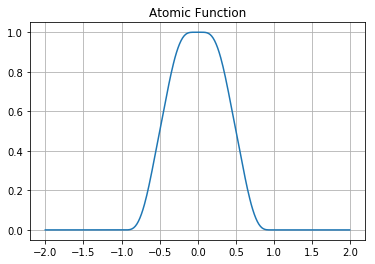

In [12]:
x = np.arange(-2.0, 2.0, 0.01)
pl.title('Atomic Function')
pl.plot(x, up(x), label='Atomic Function')
pl.grid(True)
pl.show()

### Atomic String as an Integral of Atomic Function (introduced in 2017 by Prof S.Eremenko)

In [13]:
############### Atomic String #############
def AString1(x: float) -> float:
    res = 1 * (upulse(x/2.0 - 0.5) - 0.5)
    return res

############### Atomic String Pulse with width, shift and scale #############
def AStringPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = AString1(x)
    res = d + res * c
    return res

###### Atomic String Applied to list with width, shift and scale #############
def AString(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res: list = []
    for i in range(len(x)):
        res.append(AStringPulse(x[i], a, b, c, d))
        #res[i] = AStringPulse(x[i], a, b, c)
    return res

###### Summation of two lists #############
def Sum(x1: list, x2: list) -> list:
    res: list = []
    for i in range(len(x1)):
       res.append(x1[i] + x2[i])
    return res

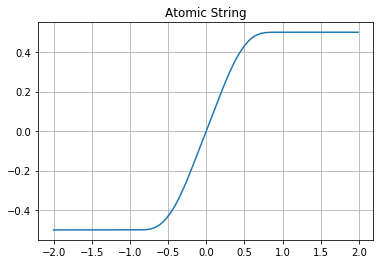

In [14]:
pl.title('Atomic String')
pl.plot(x, AString(x, 1.0, 0, 1, 0), label='Atomic String')
pl.grid(True)
pl.show()

### Atomic String, Atomic Function and Atomic Function Derivative plotted together

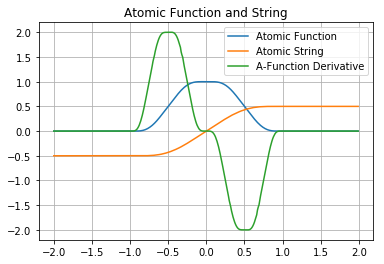

In [15]:
#This Calculates Derivative
dx = x[1] - x[0]
dydx = np.gradient(up(x), dx)
pl.plot(x, up(x), label='Atomic Function')
pl.plot(x, AString(x, 1.0, 0, 1, 0), label='Atomic String')
pl.plot(x, dydx, label='A-Function Derivative')

pl.title('Atomic Function and String')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Properties of atomic function Up(x)

1) Remarkably, Atomic Function Derivative can be exressed via Atomic Function itself - up'(x)= 2up(2x+1)-2up(2x-1) meaning the shape of pulses for derivative function can be represented by shifted and stratched Atomic Function itself - remarkable property

2) The Atomic Function pulses superposition set at points -2, -1, 0, +1, +2... can exactly represent a Unity (number 1):
1 = ... up(x-3) + up(x-2) + up(x-1) + up(x-0) + up(x+1) + up(x+2) + up(x+3) + ...

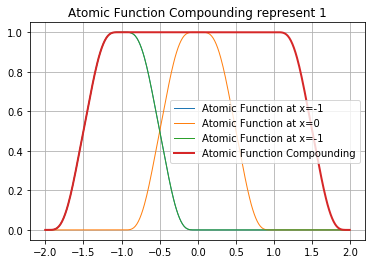

In [16]:
pl.plot(x, up(x, 1, -1), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, up(x, 1, +0), linewidth=1, label='Atomic Function at x=0')
pl.plot(x, up(x, 1, -1), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, Sum(up(x, 1, -1), Sum(up(x), up(x, 1, 1))), linewidth=2, label='Atomic Function Compounding')
pl.title('Atomic Function Compounding represent 1')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

3) Atomic Function (AF) is a 'finite' function (like spline) not equal to zero only on section |x|<=1

4) Atomic Function is a non-analytical function (can not be represented by Taylor's series), but with known Fourier Transformation allowing to exactly calculate AF in certain points, with tabular representation provided in script above.

### Atomic String is a generalisation of an Atomic Function

1) Astring is an swing-like function - Integral of Atomic Function (AF) which can be expressed via AF itself:
AString(x) = Integral(0,x)(Up(x)) = Up(x/2 - 1/2) - 1/2

2) Atomic Function can be represented via simple superposition of Atomic Strings: 
up(x) = AString(2x + 1) - AString(2x - 1)

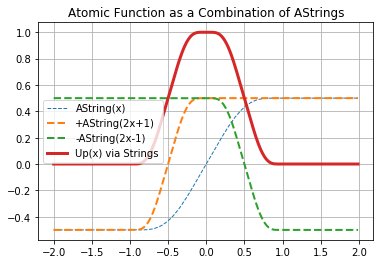

In [17]:
#########   Presentation of Atomic Function via Atomic Strings ##########
x = np.arange(-2.0, 2.0, 0.01)

pl.plot(x, AString(x, 1, 0, 1, 0),  '--', linewidth=1,  label='AString(x)')
pl.plot(x, AString(x, 0.5, -0.5, +1, 0), '--', linewidth=2, label='+AString(2x+1)')
pl.plot(x, AString(x, 0.5, +0.5, -1, 0), '--', linewidth=2, label='-AString(2x-1)')
#pl.plot(x, up(x, 1.0, 0, 1, 0),     '--', linewidth=1, label='Atomic Function')
AS2 = Sum(AString(x, 0.5, -0.5, +1, 0), AString(x, 0.5, +0.5, -1, 0))
pl.plot(x, AS2, linewidth=3, label='Up(x) via Strings')
pl.title('Atomic Function as a Combination of AStrings')
pl.legend(loc='center left', numpoints=1)
pl.grid(True)
pl.show()

3) All derivatives of AString can be represented via AString itself:
AString'(x) = AString(2x + 1) - AString(2x - 1)

4) Combination of Atomic Strings can exactly represent a straight line:
x = AString(x) + Astring(x+1) + Astring(x+2)...

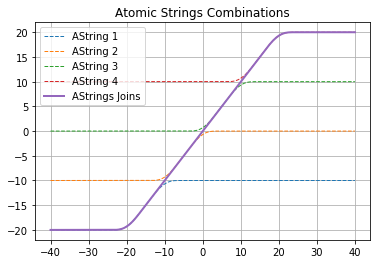

In [18]:
x = np.arange(-40.0, 40.0, 0.01)

#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, AString(x, 10.0,-15, 10, -15),   '--',  linewidth=1, label='AString 1')
pl.plot(x, AString(x, 10.0, -5, 10, -5),    '--',  linewidth=1, label='AString 2')
pl.plot(x, AString(x, 10.0, +5, 10, +5),    '--',  linewidth=1, label='AString 3')
pl.plot(x, AString(x, 10.0,+15, 10, +15),   '--',  linewidth=1, label='AString 4')

AS2 = Sum(AString(x, 10.0, -15, 10, -15), AString(x, 10., -5, 10, -5))
AS3 = Sum(AS2, AString(x, 10, +5, 10, +5))
AS4 = Sum(AS3, AString(x, 10,+15, 10, +15))
pl.plot(x, AS4,  label='AStrings Joins', linewidth=2)

pl.title('Atomic Strings Combinations')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()


### Representing of flat Spacetime Fabric by joining of Atomic Strings Quanta (Metriants)

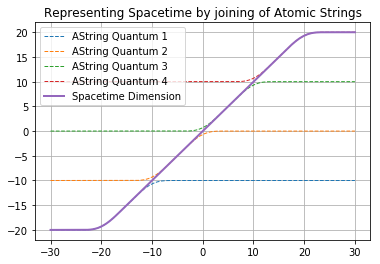

In [19]:
x = np.arange(-30.0, 30.0, 0.01)
#pl.plot(x, ABline (x, 1, 0),            label='ABLine 1*x')
pl.plot(x, AString(x, 10.0,-15, 10, -15),   '--',  linewidth=1, label='AString Quantum 1')
pl.plot(x, AString(x, 10.0, -5, 10, -5),    '--',  linewidth=1, label='AString Quantum 2')
pl.plot(x, AString(x, 10.0, +5, 10, +5),    '--',  linewidth=1, label='AString Quantum 3')
pl.plot(x, AString(x, 10.0,+15, 10, +15),   '--',  linewidth=1, label='AString Quantum 4')

AS2 = Sum(AString(x, 10.0, -15, 10, -15), AString(x, 10., -5, 10, -5))
AS3 = Sum(AS2, AString(x, 10, +5, 10, +5))
AS4 = Sum(AS3, AString(x, 10,+15, 10, +15))
pl.plot(x, AS4,  label='Spacetime Dimension', linewidth=2)

pl.title('Representing Spacetime by joining of Atomic Strings')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

### Schematic model of Gravitation explaining General Relativity effects where spacetime Shape, Density and Curvature are deeply related being expressed via the same AString or Atomic Function

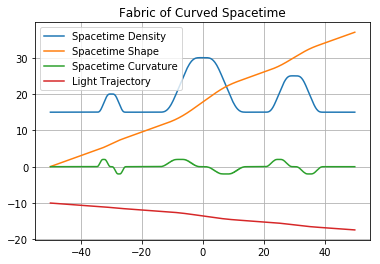

In [20]:
x = np.arange(-50.0, 50.0, 0.1)
dx = x[1] - x[0]

CS6 = Sum(up(x, 5, -30, 5, 5), up(x, 15, 0, 15, 5))
CS6 = Sum(CS6, up(x, 10, +30, 10, 5))
pl.plot(x, CS6,  label='Spacetime Density')

IntC6 = np.cumsum(CS6)*dx/50
pl.plot(x, IntC6, label='Spacetime Shape')

DerC6 = np.gradient(CS6, dx)
pl.plot(x, DerC6, label='Spacetime Curvature')

LightTrajectory = -10 -IntC6/5
pl.plot(x, LightTrajectory, label='Light Trajectory')

pl.title('Fabric of Curved Spacetime')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

Apart from standard Python code, this script and material is the intellectual property of Professor Sergei Yu. Eremenko (https://au.linkedin.com/in/sergei-eremenko-3862079). You may not reproduce, edit, translate, distribute, publish or host this document in any way without the permission of Professor Eremenko.